<a href="https://colab.research.google.com/github/AnanyaCSE-039/ML-LAB/blob/main/1BM22CS039_Lab_5_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.00
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         2
         Yes       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



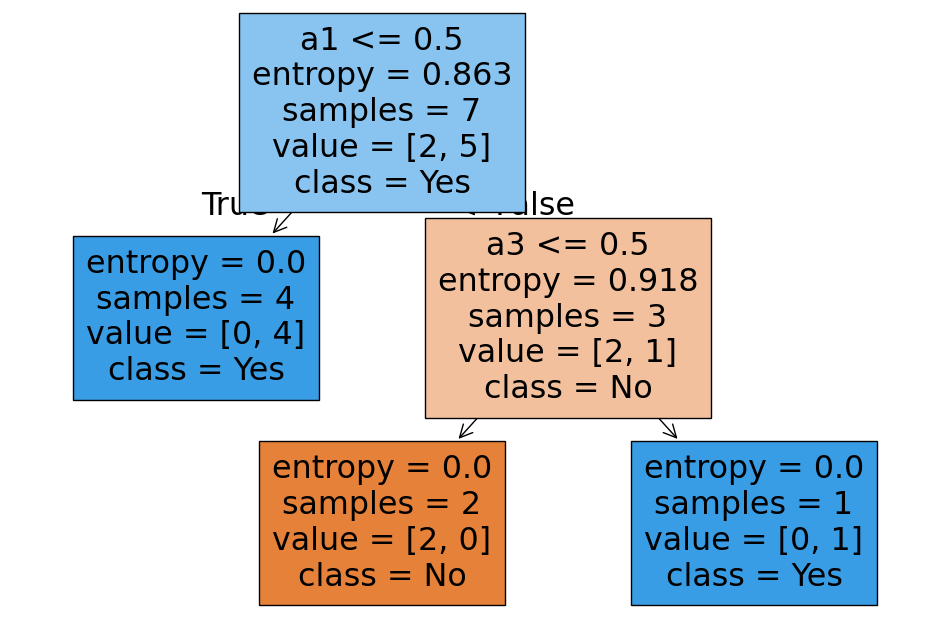

In [1]:
# -*- coding: utf-8 -*-
"""Decision_Tree.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1RXDK8CR1doVCMHgkaXpJsNLAvzOIaXdd
"""

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create the dataset
data = {
    'a1': [True, True, False, False, False, True, True, True, False, False],
    'a2': ['Hot', 'Hot', 'Hot', 'Cool', 'Cool', 'Cool', 'Hot', 'Hot', 'Cool', 'Cool'],
    'a3': ['High', 'High', 'High', 'Normal', 'Normal', 'High', 'High', 'Normal', 'Normal', 'High'],
    'Classification': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes']
}

data

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert categorical data to numerical data
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split the dataset into features and target
X = df.drop('Classification', axis=1)
y = df['Classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier with entropy as the criterion
clf = DecisionTreeClassifier(criterion='entropy')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

# Optionally, visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()


IRIS Dataset - Accuracy: 1.0
IRIS Dataset - Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


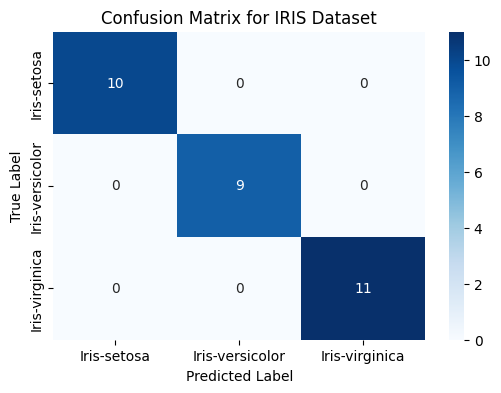

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load IRIS dataset
iris_data = pd.read_csv("iris.csv")
X_iris = iris_data.iloc[:, :-1]  # Features (all columns except last)
y_iris = iris_data.iloc[:, -1]   # Target (last column)

# Split dataset
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Train Decision Tree model
iris_clf = DecisionTreeClassifier()
iris_clf.fit(X_train_iris, y_train_iris)

# Predictions
y_pred_iris = iris_clf.predict(X_test_iris)

# Evaluation
iris_accuracy = accuracy_score(y_test_iris, y_pred_iris)
iris_conf_matrix = confusion_matrix(y_test_iris, y_pred_iris)
print("IRIS Dataset - Accuracy:", iris_accuracy)
print("IRIS Dataset - Confusion Matrix:\n", iris_conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(iris_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_iris), yticklabels=np.unique(y_iris))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for IRIS Dataset")
plt.show()

Drug Dataset - Accuracy: 1.0
Drug Dataset - Confusion Matrix:
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]


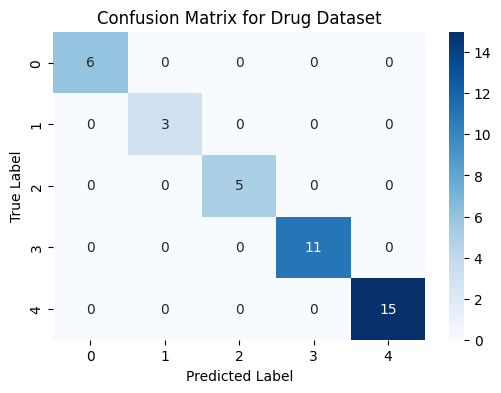

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load Drug dataset
drug_data = pd.read_csv("drug.csv")

# Convert categorical columns to numerical using Label Encoding
label_encoders = {}  # Store encoders for future use
for col in drug_data.columns:
    if drug_data[col].dtype == 'object':  # Check if column is categorical
        le = LabelEncoder()
        drug_data[col] = le.fit_transform(drug_data[col])
        label_encoders[col] = le  # Save encoder

# Split dataset
X_drug = drug_data.iloc[:, :-1]  # Features (all columns except last)
y_drug = drug_data.iloc[:, -1]   # Target (last column)

X_train_drug, X_test_drug, y_train_drug, y_test_drug = train_test_split(X_drug, y_drug, test_size=0.2, random_state=42)

# Train Decision Tree model
drug_clf = DecisionTreeClassifier()
drug_clf.fit(X_train_drug, y_train_drug)

# Predictions
y_pred_drug = drug_clf.predict(X_test_drug)

# Evaluation
drug_accuracy = accuracy_score(y_test_drug, y_pred_drug)
drug_conf_matrix = confusion_matrix(y_test_drug, y_pred_drug)
print("Drug Dataset - Accuracy:", drug_accuracy)
print("Drug Dataset - Confusion Matrix:\n", drug_conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(drug_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_drug), yticklabels=np.unique(y_drug))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Drug Dataset")
plt.show()

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
try:
  df = pd.read_csv('/content/petrol_consumption.csv')
except FileNotFoundError:
  print("Error: '/content/petrol_consumption.csv' not found. Please upload the file.")
  exit()


# Define features (X) and target (y)
X = df.drop('Petrol_Consumption', axis=1)
y = df['Petrol_Consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the DecisionTreeRegressor model
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
# Calculate RMSE by taking the square root of MSE
rmse = mse**0.5

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 54.3
Mean Squared Error: 5302.9
Root Mean Squared Error: 72.82101345078905
